# US Treasury Bill ^IRX

https://finance.yahoo.com/quote/SPY?p=SPY

If you have time, is good to invest in US Treasury when it was down and wait for long-term.

## 13 Week Treasury Bill (^IRX)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
import math
from scipy.stats import norm
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^IRX'
start = '2013-09-16'
end = '2015-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,0.052,0.060,0.050,0.055,0.055,0
2013-01-03,0.065,0.065,0.063,0.065,0.065,0
2013-01-04,0.070,0.070,0.060,0.065,0.065,0
2013-01-07,0.065,0.065,0.055,0.058,0.058,0
2013-01-08,0.065,0.065,0.060,0.060,0.060,0


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-24,0.068,0.070,0.065,0.068,0.068,0
2013-12-26,0.065,0.068,0.058,0.060,0.060,0
2013-12-27,0.060,0.060,0.058,0.058,0.058,0
2013-12-30,0.052,0.055,0.052,0.055,0.055,0
2013-12-31,0.060,0.065,0.055,0.063,0.063,0


In [4]:
df['Adj Close'].idxmin()

Timestamp('2013-09-16 00:00:00')

In [5]:
df['Adj Close'].min()

0.003

In [6]:
df['Adj Close'].max()

0.12

In [7]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


### Starting Cash with 100k to invest in Bonds

In [8]:
Cash = 100000

In [9]:
print('Number of Shares:')
shares = int(Cash/df['Adj Close'].iloc[0])
print('{}: {}'.format(symbol, shares))

Number of Shares:
^IRX: 1818181


In [10]:
print('Beginning Value:')
shares = int(Cash/df['Adj Close'].iloc[0])
Begin_Value = round(shares * df['Adj Close'].iloc[0], 2)
print('{}: ${}'.format(symbol, Begin_Value))

Beginning Value:
^IRX: $99999.96


In [11]:
print('Current Value:')
shares = int(Cash/df['Adj Close'].iloc[0])
Current_Value = round(shares * df['Adj Close'].iloc[-1], 2)
print('{}: ${}'.format(symbol, Current_Value))

Current Value:
^IRX: $114545.4


In [12]:
returns = df['Adj Close'].pct_change().dropna()

In [13]:
returns.head()

Date
2013-01-03    0.181818
2013-01-04    0.000000
2013-01-07   -0.107692
2013-01-08    0.034483
2013-01-09   -0.083333
Name: Adj Close, dtype: float64

In [14]:
returns.tail()

Date
2013-12-24    0.172414
2013-12-26   -0.117647
2013-12-27   -0.033333
2013-12-30   -0.051724
2013-12-31    0.145455
Name: Adj Close, dtype: float64

In [15]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

Date
2013-12-24    1.236364
2013-12-26    1.090909
2013-12-27    1.054545
2013-12-30    1.000000
2013-12-31    1.145455
Name: Adj Close, dtype: float64


In [16]:
# Print the mean
print("mean : ", returns.mean()*100)

# Print the standard deviation
print("Std. dev: ", returns.std()*100)

# Print the skewness
print("skew: ", returns.skew())

# Print the kurtosis
print("kurt: ", returns.kurtosis())

mean :  4.982255504512721
Std. dev:  38.82732751867047
skew:  3.9857719352220937
kurt:  23.279409133411303


In [17]:
# Calculate total return and annualized return from price data 
total_return = (returns[-1] - returns[0]) / returns[0]
print(total_return)

-0.2


In [18]:
# Annualize the total return over 12 year 
annualized_return = ((1+total_return)**(1/12))-1

In [19]:
# Calculate annualized volatility from the standard deviation
vol_port = returns.std() * np.sqrt(250)

In [20]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

-0.0031638750121881303


In [21]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns < target]

# Calculate expected return and std dev of downside
expected_return = returns.mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  4.982255504512721
--------------------------------------------------
Downside risk:
15.905251773656673
--------------------------------------------------
Sortino ratio:
0.2503736225734191


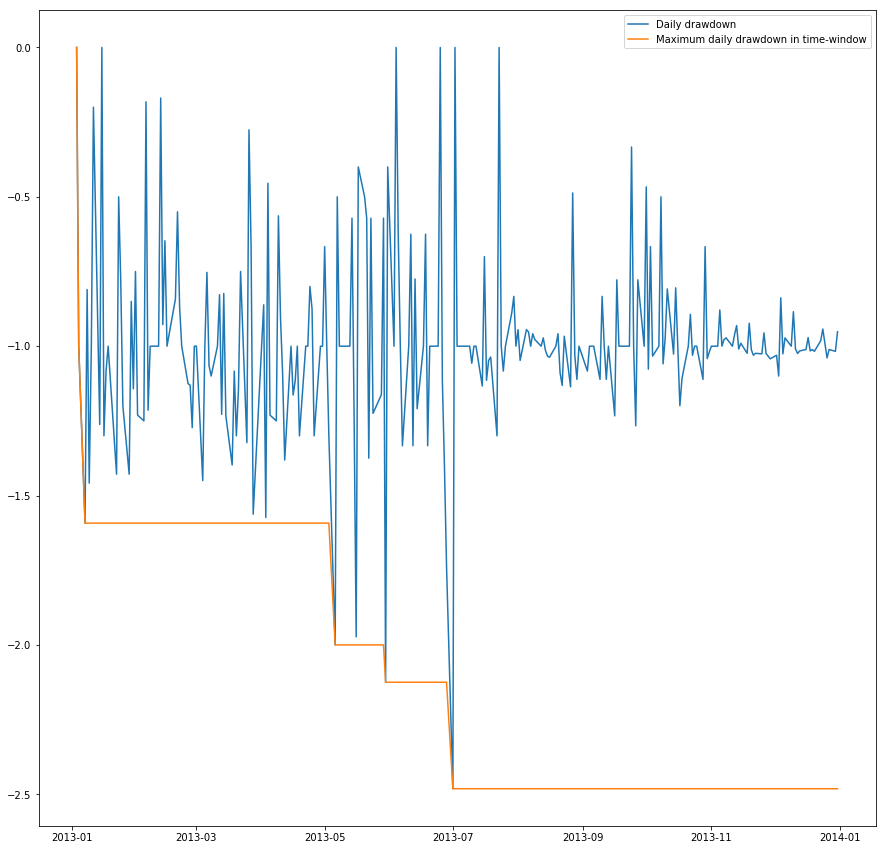

In [22]:
# Calculate the max value 
roll_max = returns.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

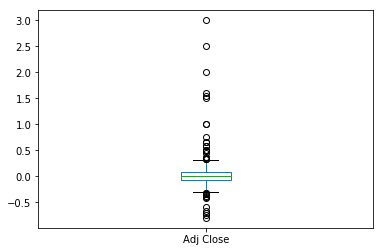

In [23]:
# Box plot
returns.plot(kind='box')

In [24]:
print("Stock returns: ")
print(returns.mean())
print('-' * 50)
print("Stock risk:")
print(returns.std())

Stock returns: 
0.04982255504512721
--------------------------------------------------
Stock risk:
0.38827327518670474


In [25]:
rf = 0.001
Sharpe_Ratio = ((returns.mean() - rf) / returns.std()) * np.sqrt(252)
print('Sharpe Ratio: ', Sharpe_Ratio)

Sharpe Ratio:  1.9961045059007179


### Value-at-Risk 99% Confidence

In [26]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns).quantile(0.01), 3)

In [27]:
print('Value at Risk (99% confidence)')
print(var99)

Value at Risk (99% confidence)
-0.683


In [28]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

Percent Value-at-Risk of the 5th quantile
68.3%


In [29]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(int(-var99 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$68300


### Value-at-Risk 95% Confidence

In [30]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns).quantile(0.05), 3)

In [31]:
print('Value at Risk (95% confidence)')
print(var95)

Value at Risk (95% confidence)
-0.333


In [32]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

Percent Value-at-Risk of the 5th quantile
33.3%


In [33]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

Value-at-Risk of 99% for 100,000 investment
$33300


In [34]:
mean = np.mean(returns)
std_dev = np.std(returns)

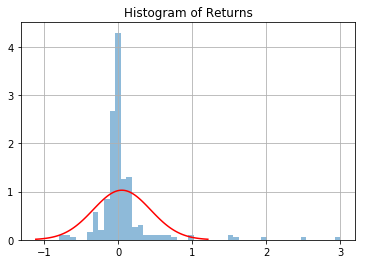

In [35]:
returns.hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')
plt.show()

In [36]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [37]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                       -0.446777
95%                       -0.587557
99%                       -0.851635


In [38]:
df['Returns'] = df['Adj Close'].pct_change()
df['SMA_250'] = df['Adj Close'].rolling(window=250).mean()
df.dropna().head()

,Open,High,Low,Close,Adj Close,Volume,Returns,SMA_250
Date,,,,,,,,
2013-12-27,0.060,0.060,0.058,0.058,0.058,0,-0.033333,0.048320
2013-12-30,0.052,0.055,0.052,0.055,0.055,0,-0.051724,0.048320
2013-12-31,0.060,0.065,0.055,0.063,0.063,0,0.145455,0.048312


In [39]:
df['Criteria'] = df['Adj Close'] >= df['SMA_250']  
df['Criteria'].value_counts()

False    249
True       3
Name: Criteria, dtype: int64

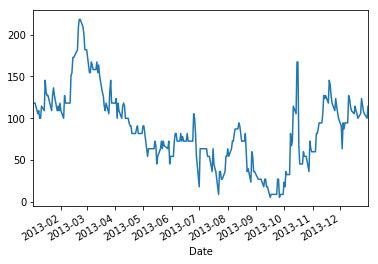

In [40]:
(100 * (1 + df['Returns']).cumprod()).plot()

In [41]:
from matplotlib.ticker import FuncFormatter

def profit_loss(x, pos):
    'The two args are the value and ticker position'
    return "${:,.0f}".format(x)

money_formatter = FuncFormatter(profit_loss)

In [42]:
def backtest(df):
    'Backtest a dataset using the SMA strategy'
    initial_value = 100000
    
    df['Criteria'] = df['Adj Close'] >= df['SMA_250']  
    df['Buy & Hold'] = initial_value * (1 + df['Returns']).cumprod()
    df['Trend'] = initial_value * (1 + (df['Criteria'].shift(1) * df['Returns'] )).cumprod() 
    
    df = df.dropna()
    start = df.index.min()
    end = df.index.max()
    
    # Plot graph
    ax = df[['Trend', 'Buy & Hold']].plot(grid=True, kind='line', title="Trend (12 month SMA) vs. Buy & Hold\n{} -  {}".format(start.year, end.year), logy=True, figsize=(12, 6))
    ax.yaxis.set_major_formatter(money_formatter)

    # Print end stats
    portfolio_value = df.iloc[-1]['Trend']
    benchmark_value = df.iloc[-1]['Buy & Hold']
    years = ((end.year - start.year - 2) * 12 + end.month - 1 + (13-start.month) ) / 12.00
    portfolio_return = (((portfolio_value / 100.00) ** (1.00/years)) - 1) * 100.00
    benchmark_return = (((benchmark_value / 100.00) ** (1.00/years)) - 1) * 100.00
    
    text = 'Portfolio value: ${:,.0f} ({:,.2f}%)'.format(portfolio_value, portfolio_return)
    text += "\n" + 'Benchmark value: ${:,.0f} ({:,.2f}%)'.format(benchmark_value, benchmark_return)
    ax.text(0.98, 0.04, text,
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12)

    return

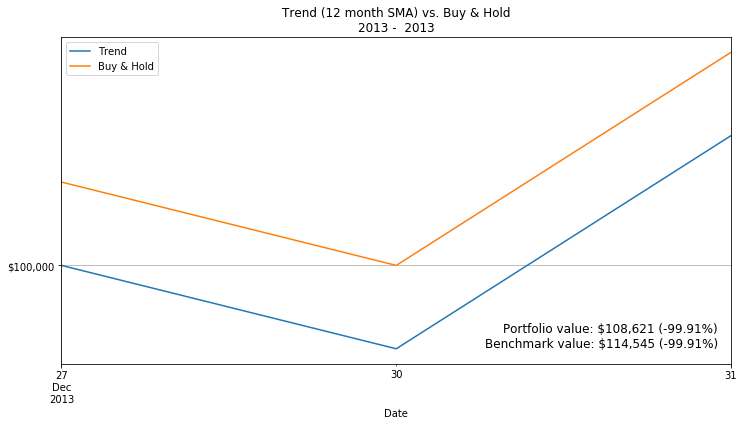

In [43]:
backtest(df)